In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import load_digits

from src.layer import Layer
from src.network import NeuralNetwork
from utils.activation_functions import ActivationFunctions
from utils.derivative_activation_functions import DerivativeActivationFunctions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
digits = load_digits()

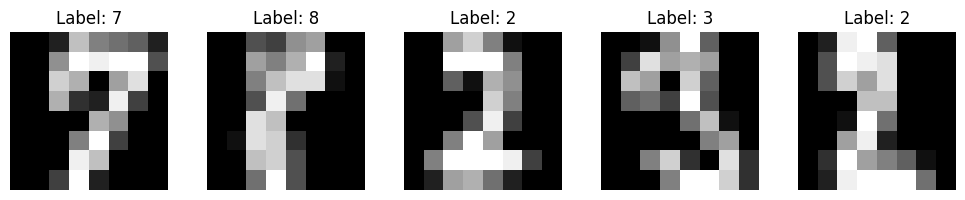

In [3]:
# Randomly choose 5 indices
random_indices = np.random.choice(len(digits.images), size=5, replace=False)

# Plot the 5 random digits
plt.figure(figsize=(10, 2))
for i, idx in enumerate(random_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(digits.images[idx], cmap='gray')
    plt.title(f"Label: {digits.target[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [4]:
df: pd.DataFrame = pd.DataFrame(digits.data)
test_sample = df.sample(1).to_numpy()

In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [6]:
X = digits.data / 16.0
y = digits.target.reshape(-1, 1)

# One-hot encode target
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [7]:
input_size = 64
output_size = 10

In [27]:
layer1 = Layer(64, 32, ActivationFunctions.relu, DerivativeActivationFunctions.relu_derivative)
layer2 = Layer(32, 20, ActivationFunctions.relu, DerivativeActivationFunctions.relu_derivative)
layer3 = Layer(20, 10, ActivationFunctions.softmax, None)

network = NeuralNetwork([layer1, layer2, layer3], 1e-4)
network.train(X_train,
              y_train,
              100)

In [28]:
accuracy = np.mean(network.infer(X_test) == np.argmax(y_test, axis=1))
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 91.39%
